## Today we are going to implement SVM on pytorch

In [1]:
import matplotlib.pyplot as plt
# use seaborn plotting defaults
import seaborn as sns; sns.set()
from sklearn.datasets.samples_generator import make_blobs

# Create toy dataset
X, Y = make_blobs(n_samples=300, centers=2, random_state=45, cluster_std=0.6)
plt.scatter(x=X[:, 0], y=X[:, 1])

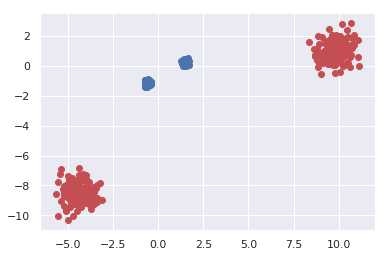

In [2]:
data = X  # Before feature scaling
X = (X - X.mean())/X.std()  # Feature scaling
Y[Y == 0] = -1  # Replace zeros with -1
plt.scatter(x=X[:, 0], y=X[:, 1])  # After feature scaling
plt.scatter(x=data[:, 0], y=data[:, 1], c='r')  # Before feature scaling

## SVM

Linear SVM primal optimization problem can be formulated as

### $ min_W \big{[}\frac{1}{n} \sum_{i=1}^n max(0, 1 - y_i (W X_i - b)) + \lambda ||W||_2 \big{]}$ 

This problem can be solved with gradient or sub-gradien methods.

We also can formulate dual optimization problem:

### $ max_{c_1,...,c_n} \big{[} \sum_{i=1}^n c_i - \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n y_i c_i (X_i \cdot X_j ) y_j c_j \big{]}$, 

### subject to $\sum_{i=1}^n c_iy_i=0, 0 \leq c_i \leq \frac{1}{2n\lambda} \forall i$.

Where **$W = \sum_{i=1}^n c_i y_i X_i$**.

In this quadratic optimization problem we can use kernel trick: introduce fucntion $K(X_i, X_j) = \phi (X_i) \phi (X_j)$ and change dot products in our optimization problem. 

Then we will have 

### $ max_{c_1,...,c_n} \big{[} \sum_{i=1}^n c_i - \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n y_i c_i K(X_i, X_j) y_j c_j \big{]}$, 

### subject to $\sum_{i=1}^n c_iy_i=0, 0 \leq c_i \leq \frac{1}{2n\lambda} \forall i$.

**$W = \sum_{i=1}^n c_i y_i \phi(X_i)$**.

In quadratic programming we can straightforwardly add kernel function, but it is not that simple, if we want to use gradient algorithms.

However, here (https://www.cs.utah.edu/~piyush/teaching/svm-solving-primal.pdf ) Olivier Chapelle did it. So the primal optimization problem with kernels can be formulated like:

### $f(x) = \sum_{i=1}^n \beta_i K(x_i, x),$

### $K: K_{i,j} = K(x_i, x_j),$

### $min_{\vec{\beta}} \big{[} \lambda \vec{\beta^T} K \vec{\beta} + \sum_{i=1}^n L(y_i, K_i^T \vec{\beta}) \big{]},$

**where L is Hinge loss: $L(y_i, K_i^T \vec{\beta}) = max(0, 1 - y_i (K_i^T \vec{\beta}))$**


### Let's code SVM with primal optimization problem and kernels on pytorch.

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch import FloatTensor as tensor


def hinge_loss(output, y):
    return # !!! Your code goes here !!!


class SVM:
    def __init__(self, train_examples, kernel_function=lambda x,y: x @ y):
        self.betas = torch.rand((train_examples, 1), requires_grad=True)
        self.bias = torch.rand(1, requires_grad=True) # I've also add bias to the model
        self.X = None
        self.kernel_function=kernel_function
        
    def fit(self, X, Y, learning_rate, epoch, batch_size=5,
            lamb=1e-4):
        X, Y = tensor(X), tensor(Y)
        self.X = X
        N = len(Y)
        K = torch.zeros(N,N)
        for i in range(N):
            for j in range(N):
                K[i][j] = # !!! Your code goes here !!!
        
        optimizer= # !!! Your code goes here !!!
        for epoch in range(epoch):
            perm = torch.randperm(N)  # Generate a set of random numbers of length: sample size
            sum_loss = 0  # Loss for each epoch
            for i in range(0, N, batch_size):
                x = X[perm[i:i + batch_size]]  # Pick random samples by iterating over random permutation
                y = Y[perm[i:i + batch_size]]  # Pick the correlating class
                x = tensor(x)
                y = tensor(y)
                slice_K = K[perm[i:i + batch_size]]
                
                optimizer.zero_grad()  # Manually zero the gradient buffers of the optimizer
                
                output = # !!! Your code goes here !!! # Compute the output by doing a forward pass
                loss = torch.mean(hinge_loss(output, y)) + torch.mean(lamb * self.betas.T @ K @ self.betas)
                loss.backward()  # Backpropagation
                optimizer.step()  # Optimize and adjust weights

                sum_loss += loss.detach().cpu().numpy()  # Add the loss

            print("Epoch {}, Loss: {}".format(epoch, sum_loss))
        
        return
    
    def predict_scores(self, X):
        X = tensor(X)
        K = torch.zeros(len(X), len(self.X))
        for i in range(len(X)):
            for j in range(len(self.X)):
                K[i][j] = # !!! Your code goes here !!!
        predictions = # !!! Your code goes here !!!
        return predictions
    
    
    def predict(self, X):
        predictions = self.predict_scores(X)
        ans = predictions.detach().numpy() > 0
        ans = (ans==False)*-1 + (ans==True) * 1
        return ans

In [4]:
model = SVM(train_examples=len(X))

In [5]:
model.fit(X,Y,0.01,20)

Epoch 0, Loss: 1767.0757853984833
Epoch 1, Loss: 1006.4283217489719
Epoch 2, Loss: 723.8103649020195
Epoch 3, Loss: 485.9690427184105
Epoch 4, Loss: 212.35494447080418
Epoch 5, Loss: 77.08322451170534
Epoch 6, Loss: 82.00051108381012
Epoch 7, Loss: 81.20127600315027
Epoch 8, Loss: 78.94526456238236
Epoch 9, Loss: 77.92537232663017
Epoch 10, Loss: 81.3254193526227
Epoch 11, Loss: 84.71301114559174
Epoch 12, Loss: 76.53996637719683
Epoch 13, Loss: 77.78427508418099
Epoch 14, Loss: 75.6832703994587
Epoch 15, Loss: 94.46130199465551
Epoch 16, Loss: 86.13889818149619
Epoch 17, Loss: 75.29701604082948
Epoch 18, Loss: 82.80329555273056
Epoch 19, Loss: 76.79505622386932


In [6]:
predictions = model.predict(X)

In [7]:
from sklearn.metrics import accuracy_score

In [8]:
accuracy_score(Y, predictions)

1.0

### So, our model works and has 100% accuracy on train data.

### SKLEARN SVM (from https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html)

In [15]:
from scipy import stats
import numpy as np
y=Y

In [16]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [17]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

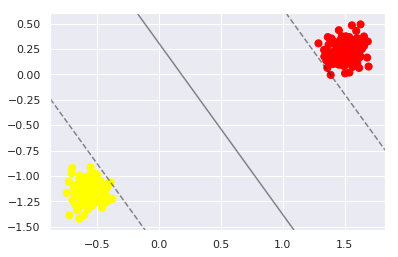

In [18]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [19]:
model.support_vectors_

array([[ 1.38693513, -0.00543319],
       [-0.39324434, -1.06336818]])

**Example with kernel from sklearn**

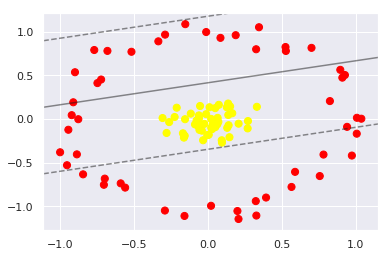

In [20]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [21]:
r = np.exp(-(X ** 2).sum(1))

In [23]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

/home/iv-provilkov/.pyenv/versions/3.6.7/envs/venv_3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

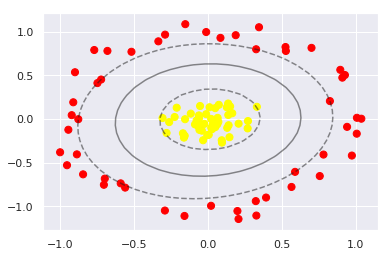

In [24]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

### Different margins for nonseparable cases

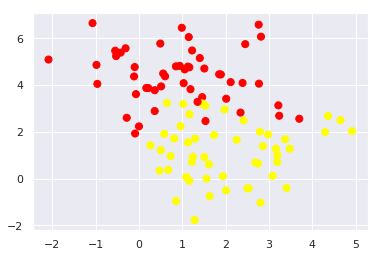

In [25]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

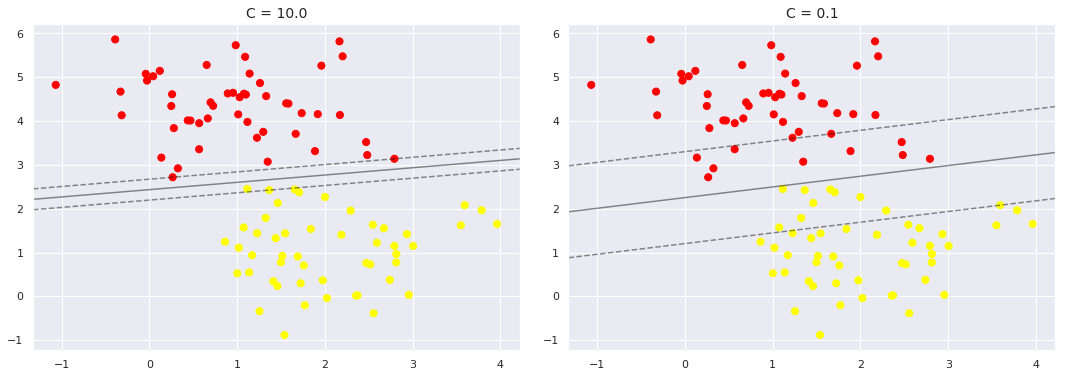

In [26]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)